## Random Forest

#### Dataset Description:

##### Use the Glass dataset and apply the Random forest model.


### 1. Exploratory Data Analysis (EDA):

#### Perform exploratory data analysis to understand the structure of the dataset.
#### Check for missing values, outliers, inconsistencies in the data.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##Read the given dataset
df= pd.read_excel("glass.xlsx",sheet_name=1)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.shape

(214, 10)

In [4]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

No Null values presnt in the dataset

In [7]:
df.duplicated().sum()

1

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


The given dataset seems to be stable, all the columns are having stable standard deviation except Ca.

In [9]:
num_col=[i for i in df.columns if df[i].dtype!='O']
num_col

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

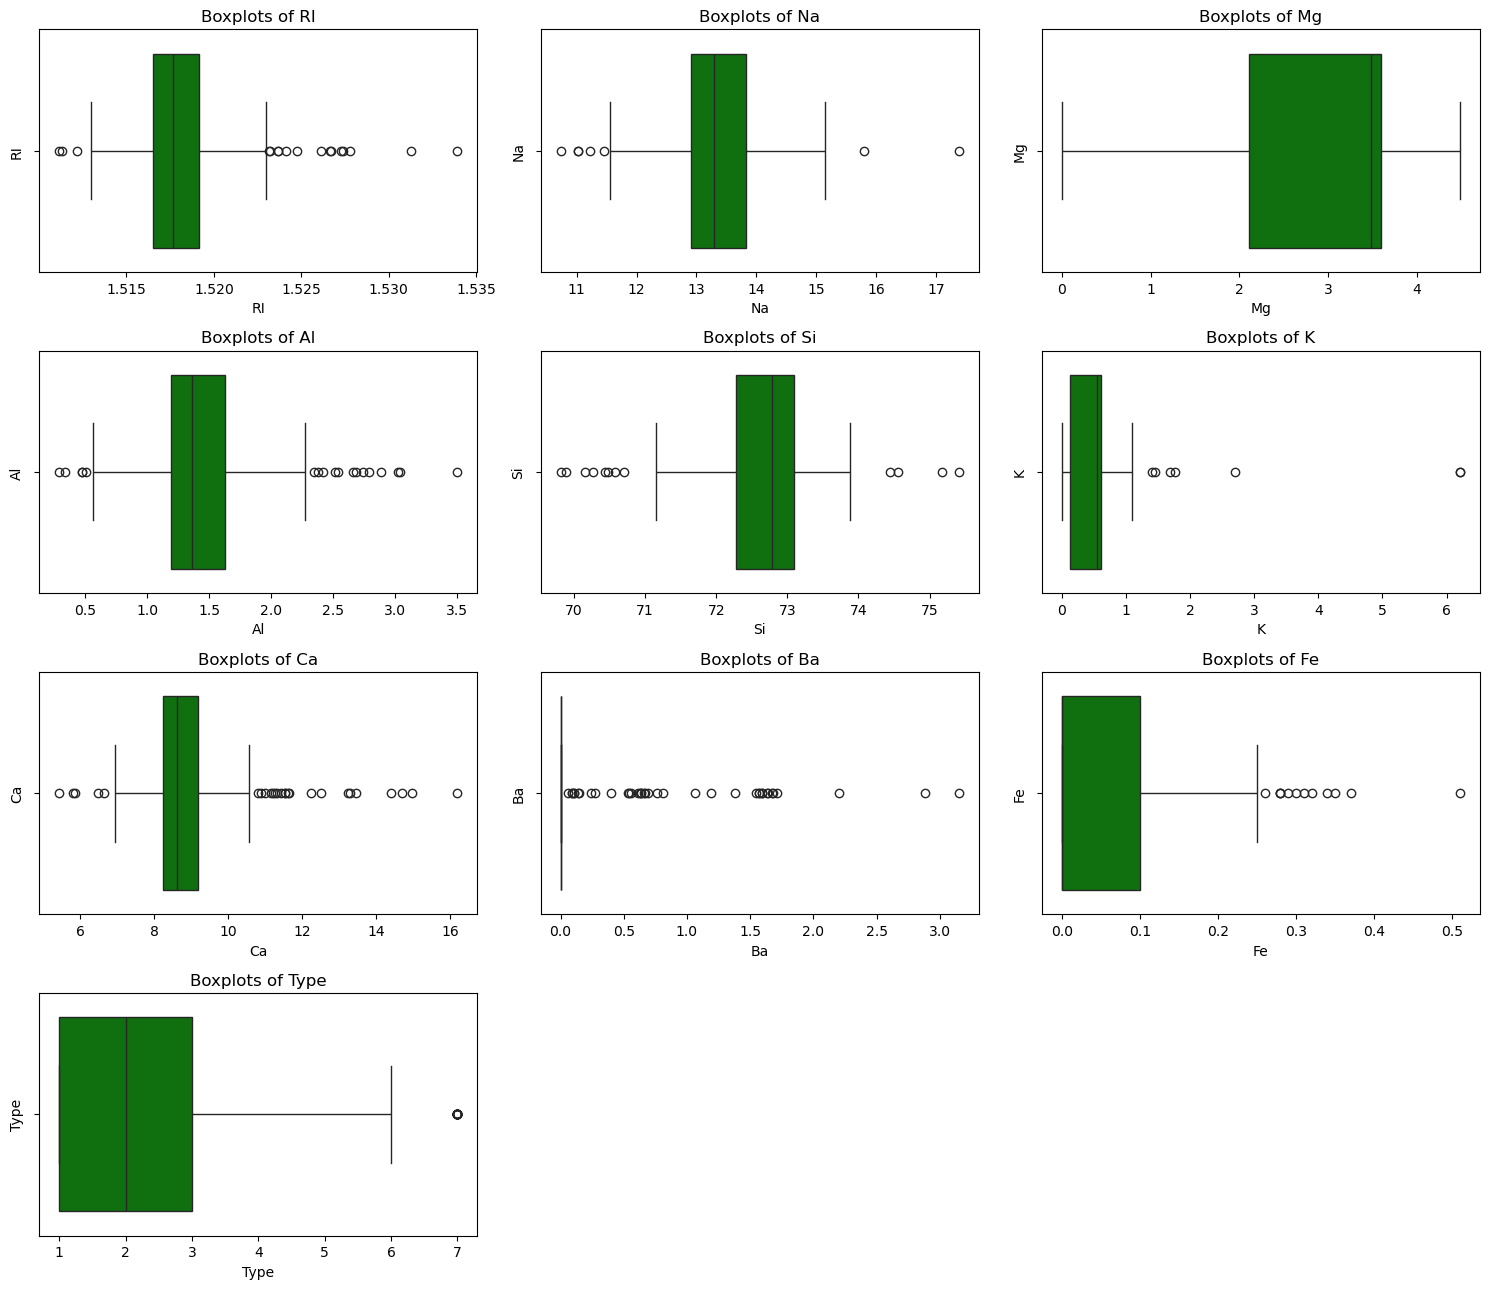

In [10]:
# Ploting the box plots to detect the outliers
plt.figure(figsize=(15,13))
index=1
for col in df.columns:
    plt.subplot(4,3,index)
    sns.boxplot(x=df[col],color='green')
    plt.title(f'Boxplots of {col}')
    index+=1
    plt.ylabel(col)
plt.tight_layout()
plt.show()
    

From the boxplots ,we can't clearly say that which columns contins outliers.

So let's detect the outliers using outlier capping method.

In [11]:
# Let's detect the above selected outliers from boxplot
def detect_outliers(df, column):                         #function to remove outliers
    Q1 = df[column].quantile(0.25)                       #defining Q1 
    Q3 = df[column].quantile(0.75)                       #defining Q3
    IQR = Q3 - Q1                                        #defining IQR
    lower_bound = Q1 - 1.5 * IQR                         #calculating lower bound
    upper_bound = Q3 + 1.5 * IQR                         #calculating upper bound
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Check for outliers in each column and summarize
outlier_summary = {}
for col in df.columns:
    outliers = detect_outliers(df, col)
    outlier_summary[col] = len(outliers)

# Display the outlier counts for each column
outlier_summary

{'RI': 17,
 'Na': 7,
 'Mg': 0,
 'Al': 18,
 'Si': 12,
 'K': 7,
 'Ca': 26,
 'Ba': 38,
 'Fe': 12,
 'Type': 29}

#### 2: Data Visualization:

##### Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
##### Analyze any patterns or correlations observed in the data.

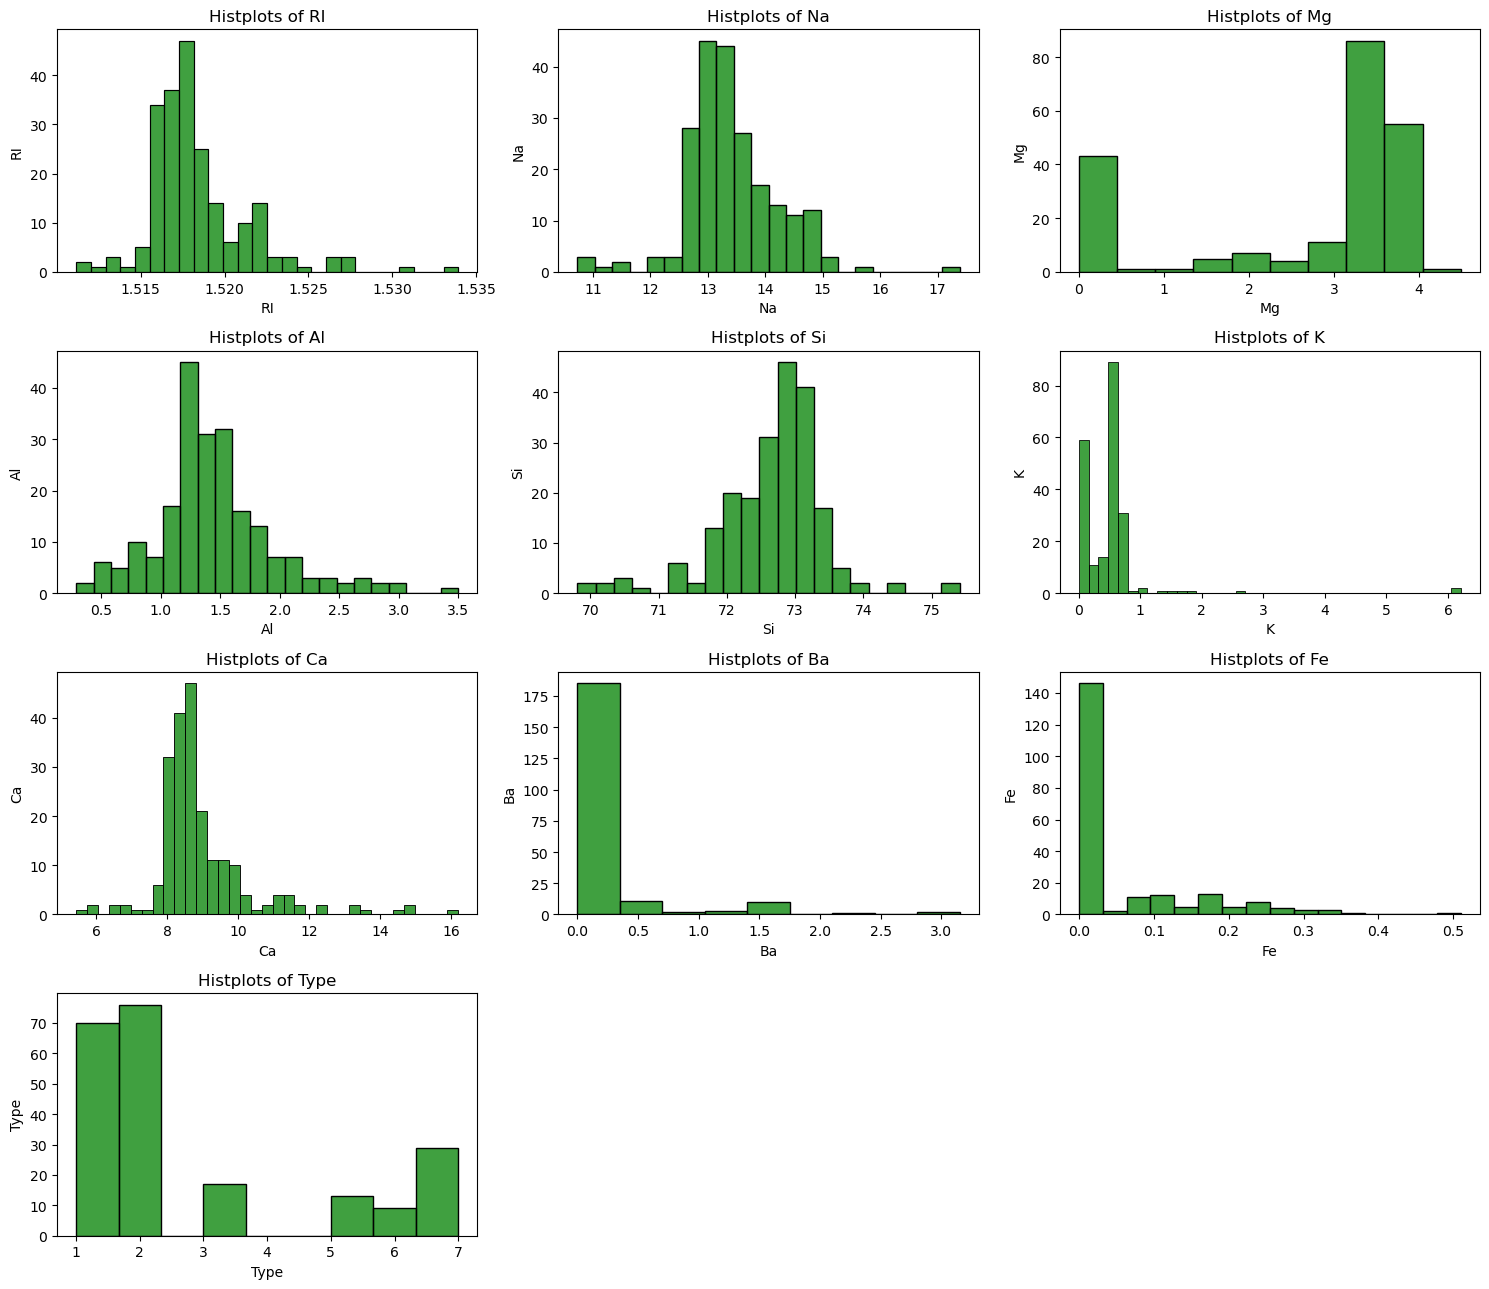

In [12]:
# Ploting the hist plots to see the data distribution
plt.figure(figsize=(15,13))
index=1
for col in df.columns:
    plt.subplot(4,3,index)
    sns.histplot(x=df[col],color='green')
    plt.title(f'Histplots of {col}')
    index+=1
    plt.ylabel(col)
plt.tight_layout()
plt.show()

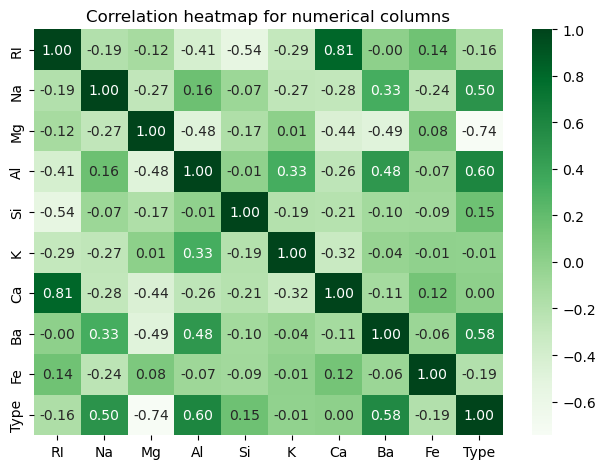

In [29]:
# let's plot correlation matrix for columns
z=df.corr(numeric_only=True)
sns.heatmap((z), cmap='Greens', cbar="True", annot=True,fmt=".2f")
plt.title("Correlation heatmap for numerical columns")
plt.tight_layout()
plt.show()

By looking at the correlation matrix ,we can say that Ca is having good correlation with RI.And many other columns are showing the good correlations.

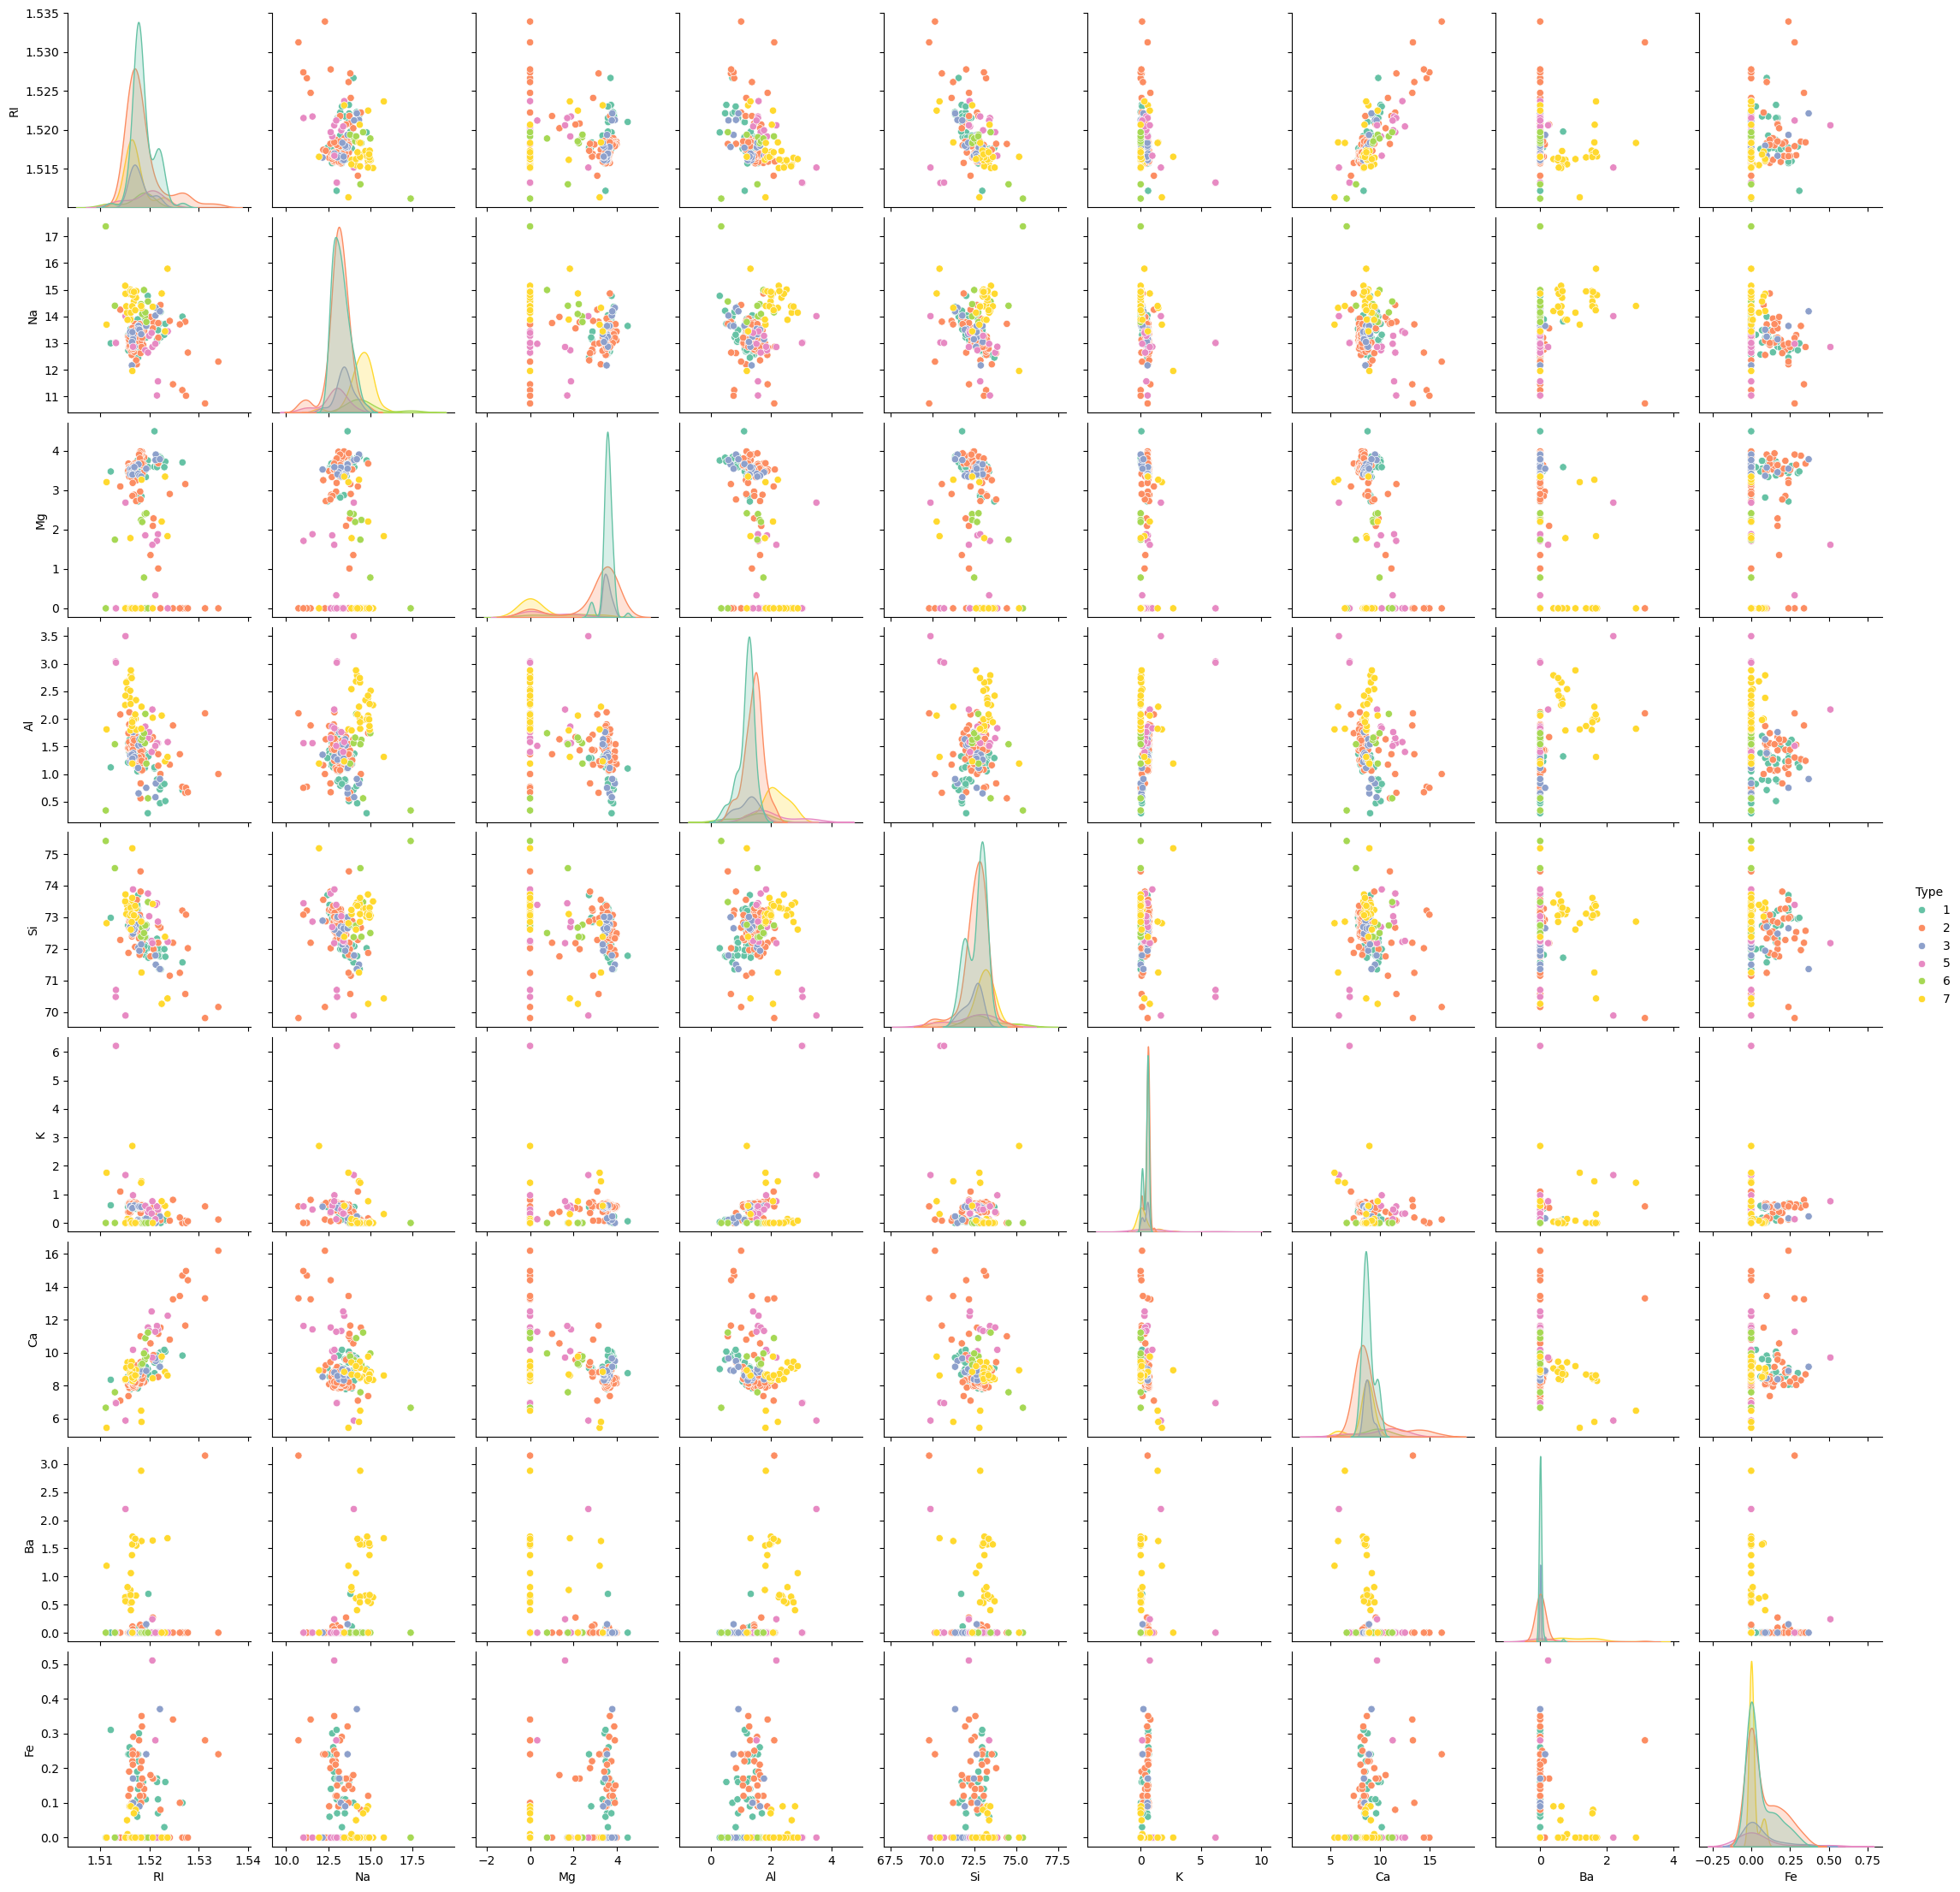

In [27]:
sns.pairplot(df, hue='Type',palette='Set2')
plt.show()

#### 3: Data Preprocessing

##### 1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
##### 2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
#####  3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.

In [30]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

We dont have any missing values in the given dataset.

And the given dataset contains only numerical coulmns, so no need to apply any encoding techniques.

In [16]:
#feature extraction
x = df.drop('Type', axis=1)
y = df['Type']
x.shape, y.shape

((214, 9), (214,))

In [17]:
# Let's scale the values using MinMaxScaler
# When we saw the description of all the columns we found that data was not all over the place so we'll use MinMaxScaler instead of StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x

array([[0.43283582, 0.43759398, 1.        , ..., 0.30855019, 0.        ,
        0.        ],
       [0.28358209, 0.47518797, 0.80178174, ..., 0.22304833, 0.        ,
        0.        ],
       [0.22080773, 0.42105263, 0.79064588, ..., 0.21840149, 0.        ,
        0.        ],
       ...,
       [0.41703248, 0.54586466, 0.        , ..., 0.27973978, 0.52063492,
        0.        ],
       [0.23529412, 0.54887218, 0.        , ..., 0.28345725, 0.4984127 ,
        0.        ],
       [0.26163301, 0.52631579, 0.        , ..., 0.2964684 , 0.53015873,
        0.        ]])

#### 4: Random Forest Model Implementation
##### 1. Divide the data into train and test split.
##### 2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
##### 3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.


In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((171, 9), (43, 9), (171,), (43,))

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model

RandomForestClassifier()

In [20]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Testing Accuracy Score : ",accuracy_score(model.predict(x_test), y_test))
print("Testing Precision Score : ",precision_score(model.predict(x_test), y_test, average='weighted'))
print("Testing Recall Score : ",recall_score(model.predict(x_test), y_test, average='weighted'))
print("Testing F1 Score : ",f1_score(model.predict(x_test), y_test, average='weighted'))

Testing Accuracy Score :  0.8604651162790697
Testing Precision Score :  0.8939645625692137
Testing Recall Score :  0.8604651162790697
Testing F1 Score :  0.8635889418379158


#### 5: Bagging and Boosting Methods
##### Apply the Bagging and Boosting methods and compare the results.



In [22]:
#Applying Bagging Method
from sklearn.ensemble import BaggingClassifier


bagging_model = BaggingClassifier(
    estimator = RandomForestClassifier(),
    n_estimators = 100,
    random_state = 42
)
bagging_model.fit(x_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=42)

In [23]:
from sklearn.metrics import classification_report

print("Bagging Accuracy : ", accuracy_score(bagging_model.predict(x_test), y_test))
print("Classification Report : \n", classification_report(bagging_model.predict(x_test), y_test))

Bagging Accuracy :  0.8372093023255814
Classification Report : 
               precision    recall  f1-score   support

           1       1.00      0.73      0.85        15
           2       0.71      0.83      0.77        12
           3       0.67      1.00      0.80         2
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         3
           7       1.00      0.89      0.94         9

    accuracy                           0.84        43
   macro avg       0.81      0.91      0.84        43
weighted avg       0.88      0.84      0.84        43



In [24]:
#Applying Gradient Boosting Method
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators = 200,
    learning_rate = 0.1,
    max_depth = 5,
    random_state = 42
)
gb_model.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=200, random_state=42)

In [25]:
print("Gradient Boosting Accuracy : ", accuracy_score(gb_model.predict(x_test), y_test))
print("Classification Report : \n", classification_report(bagging_model.predict(x_test), y_test))

Gradient Boosting Accuracy :  0.8837209302325582
Classification Report : 
               precision    recall  f1-score   support

           1       1.00      0.73      0.85        15
           2       0.71      0.83      0.77        12
           3       0.67      1.00      0.80         2
           5       0.50      1.00      0.67         2
           6       1.00      1.00      1.00         3
           7       1.00      0.89      0.94         9

    accuracy                           0.84        43
   macro avg       0.81      0.91      0.84        43
weighted avg       0.88      0.84      0.84        43



##### Report on all the accuracy score:

* RandomForestClassifier : 0.813953488372093
* Bagging Accuracy : 0.8372093023255814
* Gradient Boosting Accuracy : 0.8837209302325582
* Here we can see that gradient boosting methods performs the best among all the other methods.
* Initially gradient boosting yielded an accuracy score of 0.86 but setting up n_estimator to 200 it's score incresed to 0.88
* There is a 0.023255813953488413 differnce between Random Forest and Bagging Method
* Bagging is where parallel execution takes place.
* Boosting is where sequential execution takes place.

#### Additional Notes:
* 1. Explain Bagging and Boosting methods. How is it different from each other.
* 2. Explain how to handle imbalance in the data.

##### Explain Bagging and Boosting methods. How is it different from each other.
Answer : Bagging and Boosting are both ensemble learning methods that combines trees models to improve performance.

* Bagging: Also called as Bootstrap Aggregator
* The goal of bagging is to reduce the variance and prevent overfitting.
* The way it works is it combines multiple models (weak learners) are trained in parallel with different bootstrap samples of the data
* Each model has equal weight in the final prediction which is done via voting

Example : BaggingClassifier, RandomForestClassifier (a special case of bagging)

* Boosting:
* The goal of Boosting is to focus on misclassified data and reduce bias
* The way it works is, the models are trained sequentially with each next model fixing the errors of the previous models
* Here the models with misclassified data are given more weight indicating their importance
* The final prediction is weighted combination of all the models.

example : gradient boosting, ada boosting, XGboost, LightGBM, CatBoost etc

#### Feature | Bagging | Boosting

* Training | Parallel | Sequential
* Focus | Reduce variance | Reduce bias
* Weight Adjustment| Equal weights for all models | Focuses more on misclassified samples
* Overfitting | Reduces overfitting | Prone to overfitting if not tuned
* Examples | Random Forest, BaggingClassifier | AdaBoost, Gradient Boosting, XGBoost

#### Explain how to handle imbalance in the data.
Answer : There are several ways to handle imbalanced data,

* DATA LEVEL TECHNIQUES
1. Resampling Method : It has 2 way
* A. Oversampling : Increasing the number of minority class samples.

* B. Undersampling : Reduce the number of majority class samples to match the minority class.

2. Class Weight : Assign higher weight to the minority class during training
3. Generate Synthetic Data : Use techniques like SMOTE, ADASYN or Borderline-SMOTE to create synthetic samples for minority class.

4. ALGORITHM LEVEL TECHNIQUES
* Ensemble Methods for imblance example Random Forest, XGBoost or LightGBM
* Threshold Tuning
* Anomaly Detection Models